<hr style="height:2px; width:100%">

<h1 style="color:#32611D">Task P4: SIG 734 Data Wrangling - Working with pandas Data Frames (Heterogeneous Data)</h1>

<p style="color:#551D61; font-size:16px";>
    Name: &emsp;&emsp;&emsp; Suraj Mathew Thomas<br>
    Student ID: &ensp; S223509398<br>
    Email ID: &emsp;&ensp;&ensp; s223509398@deakin.edu.au<br><br>
</p>

<hr style="height:2px; width:100%">


<h2 style="color:#336699"> Introduction</h2>

* In this task we are allowed to use the pandas dataframe

<p style="color:#20568B; font-size:15px";>
This task is about using the pandas, numpy and scipy libraries and performing analysis on the NYC Flight data for 2013. The observations in the dataset are about the temparature, humidity, pressure, visibility and other factors along with timestamps. These are essentials observations, that would aid in the fligts take off and landing at the airports in NYC.</p>

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 1: Importing the necessary libraries</h2>

In [33]:
#Importing the necessary libraries. We are supposed to perform the entire analysis using only numpy and scipy
#Pandas is not to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for graphical plotting and visusalization
%matplotlib.inline #to ensure that the plots are displayed inline in the Jupyter notebook
import scipy.stats as stats
import seaborn as sns #for plots and visualizations
import scipy.stats as stats
import statistics as st
from scipy.stats.mstats import mquantiles
from scipy.stats import iqr
from scipy.stats import pearsonr

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 2: Read the File using Pandas Read CSV function </h2>

In [16]:
flight_data = pd.read_csv("nycflights13_weather.csv",skiprows = 42) #Reading the dataset using read csv into a dataframe
# The first 42 rows are skipped because they contain comments in the source file and are not the actual data.

In [17]:
flight_data.head() #Visualizing that the data is read properly by displaying the first 5 rows

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [18]:
flight_data.shape #Finding out the number of observations and variables in the dataset.

(26130, 15)

In [19]:
print('The number of rows (observations) is',flight_data.shape[0],'\n''The number of columns (variables) is',flight_data.shape[1])

The number of rows (observations) is 26130 
The number of columns (variables) is 15


<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 3: Convert the observations to SI units [Derive the units using formula] </h2>

<p style="color:#20568B; font-size:15px";>
Some of the units of measurements given in the data set are Farenheit, inches, miles per hour. These need to be converted into Celcius, millimeters and meters per second respectively. We will use the below converstion formulas to convert and replace the converted column values into the dataframe.</p>

In [20]:
flight_df = flight_data.copy()

In [21]:
flight_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [22]:
#Converting the necessary columns into the SI system of units
flight_df["temp"] = (flight_df["temp"] - 32) * 5/9 #Converting from Fahrenheit to Celsius
flight_df["dewp"] = (flight_df["dewp"] - 32) * 5/9 #Converting from Fahrenheit to Celsius
flight_df["precip"] = flight_df["precip"]* 25.4 #Converting from inches to millimeters
flight_df["wind_speed"] = flight_df["wind_speed"]* 0.447 #Converting from mph to m/s
flight_df["wind_gust"] = flight_df["wind_gust"]* 0.447 #Converting from mph to m/s
flight_df["visib"] = flight_df["visib"]* 0.447 #Converting from mph to m/s

In [23]:
flight_df.head() #Visualizing the dataframe with the converted values on temp, dewp, precip, wind_speed, wind_gust and visib

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,4.629588,5.327637,0.0,1013.9,4.47,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,6.172784,7.103516,0.0,1013.0,4.47,2013-01-01 02:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,5.658385,6.511557,0.0,1012.6,4.47,2013-01-01 03:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,6.172784,7.103516,0.0,1012.7,4.47,2013-01-01 04:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,6.687183,7.695476,0.0,1012.8,4.47,2013-01-01 05:00:00


<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 4: Shifting the time_hour by 1 hour back to rectify the bug </h2>

<p style="color:#20568B; font-size:15px";>
The question stated that there is a bug in the dataset where, the data in the time_hour column is not captured properly.The time is shifted ahead by 1 hour. Therefore to rectify this bug we need to shift back the timestamp back by 1 hour.</p>

In [24]:
# Convert time_hour column to datetime and subtract 1 hour
flight_df["time_hour"] = pd.to_datetime(flight_df["time_hour"]) - pd.Timedelta(hours=1)

In [25]:
flight_df.head() #Visualizing the rectified dataframe

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,4.629588,5.327637,0.0,1013.9,4.47,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,6.172784,7.103516,0.0,1013.0,4.47,2013-01-01 01:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,5.658385,6.511557,0.0,1012.6,4.47,2013-01-01 02:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,6.172784,7.103516,0.0,1012.7,4.47,2013-01-01 03:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,6.687183,7.695476,0.0,1012.8,4.47,2013-01-01 04:00:00


<h2 style="color:#1D3361"> EDA </h2>

In [26]:
#Checking for duplicates
is_duplicate = flight_df.duplicated() #Checking to see if there are any duplicate rows in the dataset
print('Number of duplicate rows = %d' % (is_duplicate.sum()))

Number of duplicate rows = 0


#### There are no duplicate rows

#### EDA - 5 Number Summary of all the numeric variables ( data types of integer and float values)

In [27]:
flight_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,26130.0,2013.000000,0.000000,2013.00,2013.000000,2013.000000,2013.000000,2013.000000
month,26130.0,6.505741,3.440031,1.00,4.000000,7.000000,9.000000,12.000000
day,26130.0,15.679717,8.765022,1.00,8.000000,16.000000,23.000000,31.000000
hour,26130.0,11.518408,6.916581,0.00,6.000000,12.000000,18.000000,23.000000
temp,26129.0,12.890842,9.878958,-11.70,4.400000,12.800000,21.100000,37.800000
dewp,26129.0,5.214111,10.762027,-23.30,-3.300000,5.600000,14.400000,25.600000
humid,26129.0,62.347322,19.196078,12.74,46.990000,61.660000,78.620000,100.000000
wind_dir,25712.0,198.066661,107.841624,0.00,120.000000,220.000000,290.000000,360.000000
wind_speed,26127.0,4.646953,3.808976,0.00,3.086392,4.115189,6.172784,468.617179
wind_gust,26127.0,5.347621,4.383294,0.00,3.551758,4.735678,7.103516,539.275278


In [28]:
#Missing Value Analysis
missing_values=pd.DataFrame(flight_df.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / flight_df.shape[0] * 100.00,2)
missing_values

,Features,Missing count,% missing
0,origin,0,0.00
1,year,0,0.00
2,month,0,0.00
3,day,0,0.00
4,hour,0,0.00
5,temp,1,0.00
6,dewp,1,0.00
7,humid,1,0.00
8,wind_dir,418,1.60
9,wind_speed,3,0.01


#### We can see that two columns, wind_dir (which is wind direction) and pressure have missing values


In [38]:
categorical_features=[]
numerical_features=[]
for i in flight_df.columns:
    if flight_df[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)
print("The categorical features are", categorical_features) 
print("The numeric features are", numerical_features)

The categorical features are ['origin']
The numeric features are ['year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'time_hour']


In [40]:
#Unique values in each of the columns of Object Datatype and the number of observations 
#These are categorical variables
for column in flight_df.columns:
    if flight_df[column].dtype == 'object':
        print(column.upper(),': ',flight_df[column].nunique())
        print(flight_df[column].value_counts().sort_values())
        print('\n')

ORIGIN :  3
EWR    8708
JFK    8711
LGA    8711
Name: origin, dtype: int64




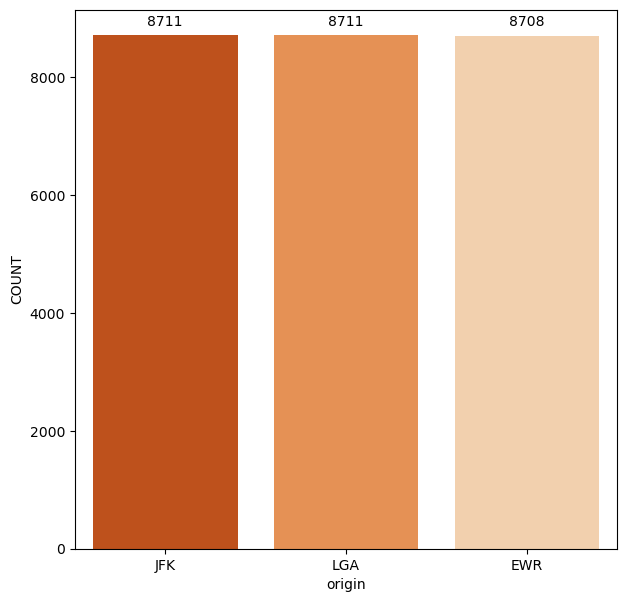

In [42]:
#Visual Representation of Categorical Variables in the dataset
#Origin
plot1 = pd.DataFrame(flight_df['origin'].value_counts())
plot1 = plot1.reset_index()
plot1.columns = ["origin","COUNT"]
fig_dims = (7, 7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='origin',y='COUNT',ax=ax,data=plot1,palette="Oranges_r")
for z in ax.patches:
    ax.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

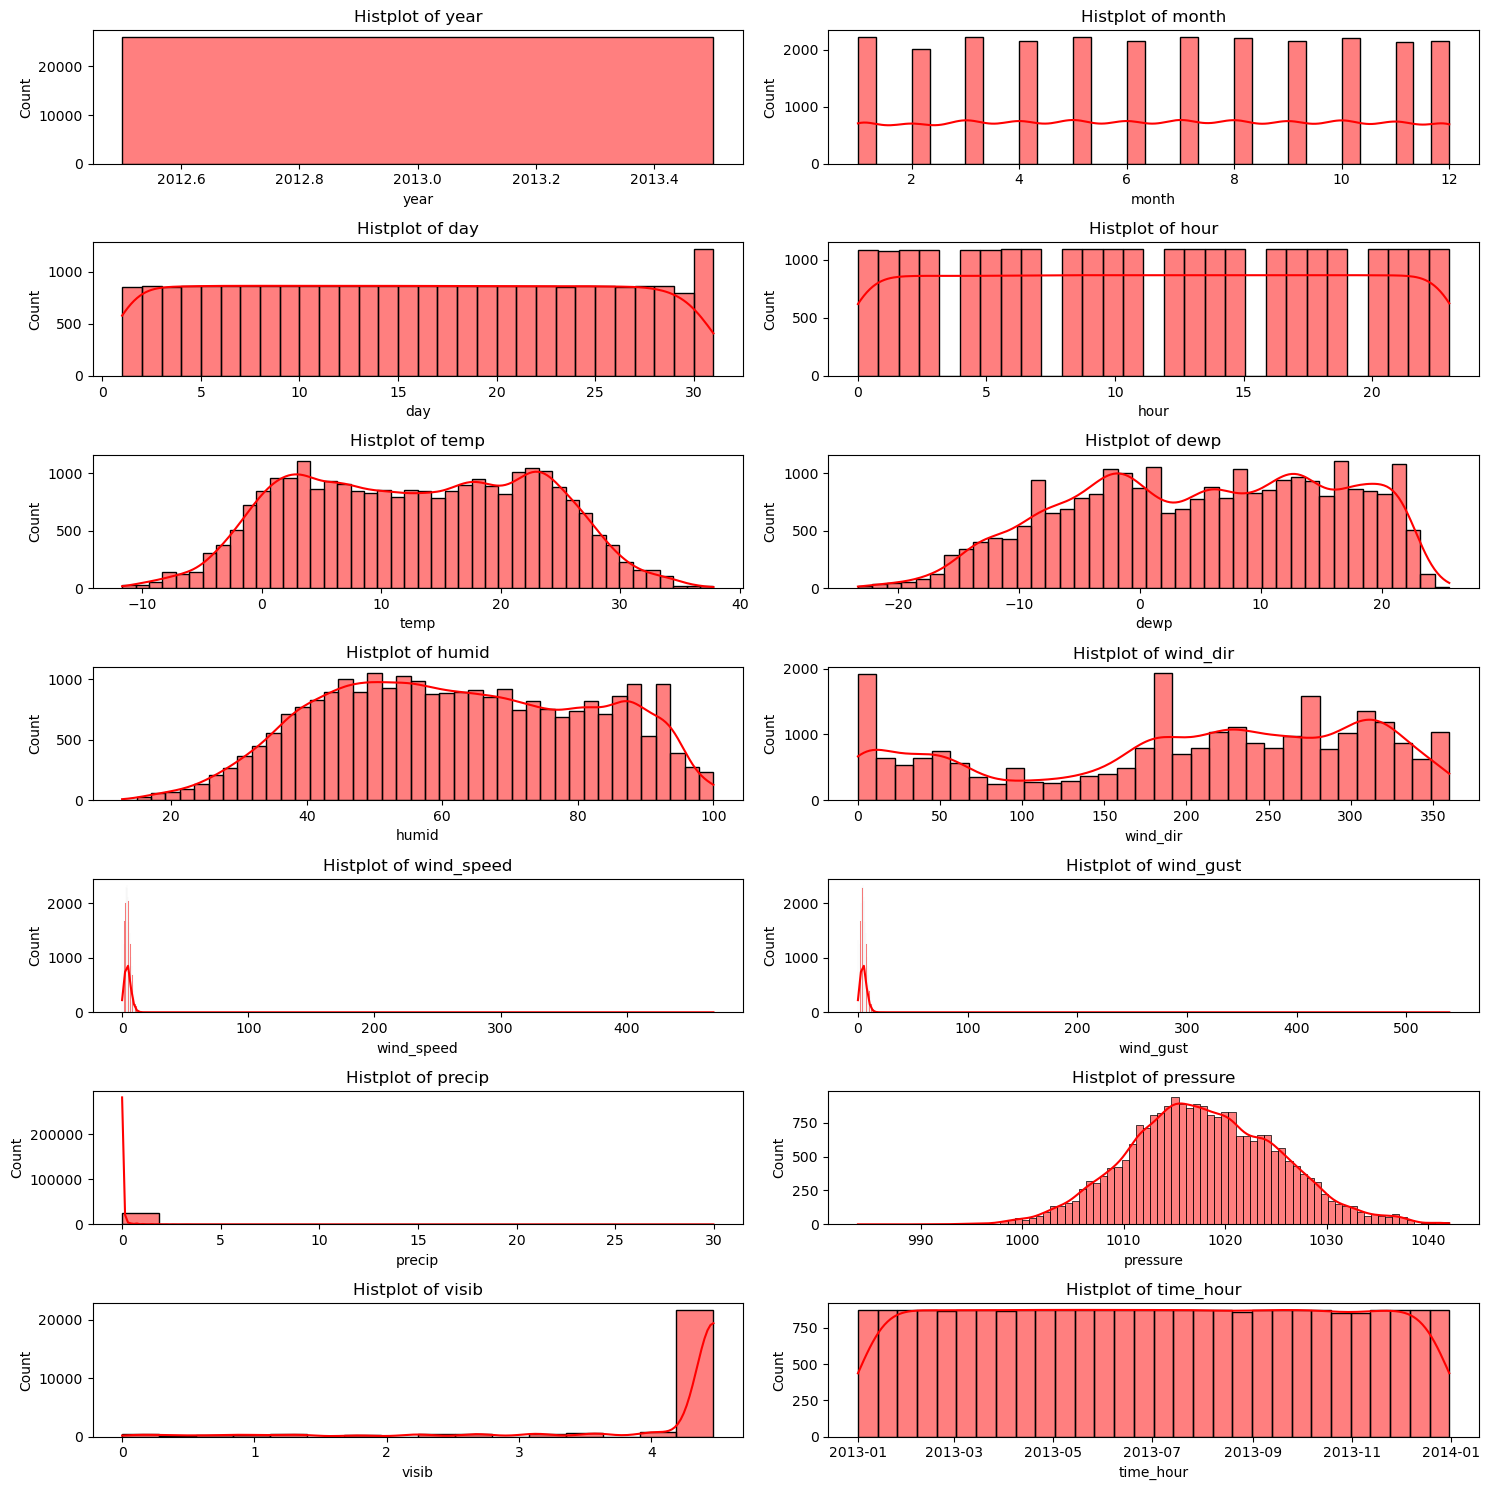

In [46]:
plt.figure(figsize = (15,15))
feature_list = numerical_features
for i in range(len(feature_list)):
    plt.subplot(7, 2, i + 1)
    sns.histplot(x = flight_df[feature_list[i]], data = flight_df,color="red",kde=True)
    plt.title('Histplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 5: Computing the daily mean wind speeds for LGA airport </h2>

<p style="color:#20568B; font-size:15px";>
In this step we will look at how we will compute the mean wind speed of LGA airport alone. The mean wind speed should be grouped by year, month and day.</p>

* First from the entire dataset, we will filter out the LGA subset into a new dataframe.
* Next we will group the subset by year, month and day and then calculate the mean.
* We will then get a data Series which will be then converted into a dataframe and the index is reset.
* The subset with mean calcuated has 364 observations and 4 columns.
* A new date column is then added to the exiting dataset that combines the year, month and day and using the to_datetime function.

### LGA AIRPORT

In [48]:
# Filtering data for LGA airport
lga_df = flight_df[flight_df['origin'] == 'LGA']

In [49]:
# Group by year, month, and day and compute mean wind speed
lga_daily_wind_speed_mean = lga_df.groupby(['year', 'month', 'day'])['wind_speed'].mean()

In [50]:
lga_daily_wind_speed_mean

year  month  day
2013  1      1      6.687183
             2      6.429983
             3      4.908221
             4      6.880082
             5      5.143987
                      ...   
      12     26     3.300725
             27     5.401186
             28     4.672454
             29     3.793690
             30     6.001318
Name: wind_speed, Length: 364, dtype: float64

In [51]:
lga_daily_wind_speed_mean.shape

(364,)

In [52]:
#Transforming the Series into a Data Frame
mean_df_lga = lga_daily_wind_speed_mean.to_frame().reset_index()

In [53]:
mean_df_lga.shape

(364, 4)

In [54]:
mean_df_lga

,year,month,day,wind_speed
0,2013,1,1,6.687183
1,2013,1,2,6.429983
2,2013,1,3,4.908221
3,2013,1,4,6.880082
4,2013,1,5,5.143987
...,...,...,...,...
359,2013,12,26,3.300725
360,2013,12,27,5.401186
361,2013,12,28,4.672454
362,2013,12,29,3.793690


In [55]:
# Create a new column 'date' for plotting
mean_df_lga['date'] = pd.to_datetime(mean_df_lga[['year', 'month', 'day']])

In [56]:
mean_df_lga #Final summerized dataframe which has the daily mean wind speeds.
#This is grouped by year month and day.

,year,month,day,wind_speed,date
0,2013,1,1,6.687183,2013-01-01
1,2013,1,2,6.429983,2013-01-02
2,2013,1,3,4.908221,2013-01-03
3,2013,1,4,6.880082,2013-01-04
4,2013,1,5,5.143987,2013-01-05
...,...,...,...,...,...
359,2013,12,26,3.300725,2013-12-26
360,2013,12,27,5.401186,2013-12-27
361,2013,12,28,4.672454,2013-12-28
362,2013,12,29,3.793690,2013-12-29


<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 6: Daily Mean of Wind Speeds in a single plot </h2>


<p style="color:#20568B; font-size:15px";>
Using the above mean dataframe, we will not plot the line graph where the x-axis is the dates and the y-axis is the daily average wind speed.</p>

<p style="color:#20568B; font-size:15px";>
We can see from the plotted graph below that the daily average wind speed is highest around the mid week of February and around last week of November and last week of January.
</p>

<p style="color:#20568B; font-size:15px";>
Wind Speeds are consistently max around a few dates in February</p>


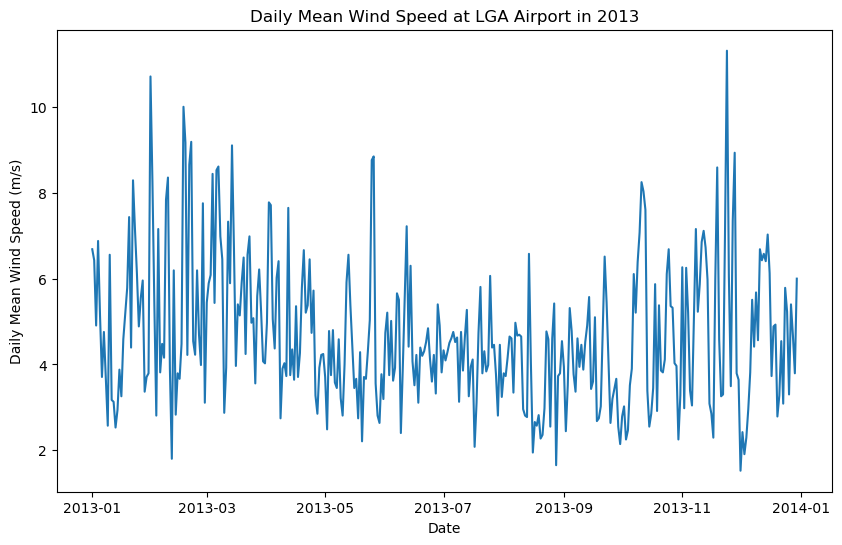

In [57]:
# Plot daily mean wind speed
plt.figure(figsize=(10, 6)) #Specifying the plot size
plt.plot(mean_df_lga['date'], mean_df_lga['wind_speed']) #plotting the graph
#Labelling the graph
plt.xlabel('Date')
plt.ylabel('Daily Mean Wind Speed (m/s)')
plt.title('Daily Mean Wind Speed at LGA Airport in 2013')
plt.show()

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 7: Ten Windiest Days at LGA airport - Dates with their corresponding mean daily wind speeds. </h2>


<p style="color:#20568B; font-size:15px";>
Next we need to find the windiest days (top 10 days) pertaining to he LGA airport.</p>

<p style="color:#20568B; font-size:15px";>
For this we would need to sort the above dataframe by descending and then extract only the top 10 rows</p>

<p style="color:#20568B; font-size:15px";>
We can again confirm that February has a few days that are windiest.</p>

<p style="color:#20568B; font-size:15px";>
The windiest day is 24th November with average wind speeds reaching to 11.31 m/s.</p>

<p style="color:#20568B; font-size:15px";>
In the top 10 windiest days the wind speeds range between 8.65 m/s and 11.31 m/s.</p>

In [58]:
mean_df_lga.sort_values(by = 'wind_speed', ascending=False, inplace=True)

In [59]:
mean_df_lga[['date', 'wind_speed']].head(10)

,date,wind_speed
327,2013-11-24,11.316771
30,2013-01-31,10.716639
47,2013-02-17,10.009341
51,2013-02-21,9.192080
48,2013-02-18,9.173443
72,2013-03-14,9.109143
331,2013-11-28,8.937677
145,2013-05-26,8.851944
144,2013-05-25,8.766210
50,2013-02-20,8.659044


<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 8: Monthly Mean Wind Speeds for all the 3 Airports. </h2>


<p style="color:#20568B; font-size:15px";>
There is an extreme outlier in wind speeds. In order to find that out, we will plot a box plt to figure out the anomoly.
</p>

<p style="color:#20568B; font-size:15px";>
We can see the wind speed of 468.61 m/s as the outlier.
</p>

<p style="color:#20568B; font-size:15px";>
We will remove this out and then calculate the monthly means by airports.
</p>

<p style="color:#20568B; font-size:15px";>
Subsets of the orginal data are extracted. 3 subsets are obtained when filtered by airport.
</p>

<p style="color:#20568B; font-size:15px";>
We then group each of the subset by month and calcualte the mean.
</p>

<p style="color:#20568B; font-size:15px";>
The three resultant sets are then merged into one dataframe for further visual plotting.
</p>

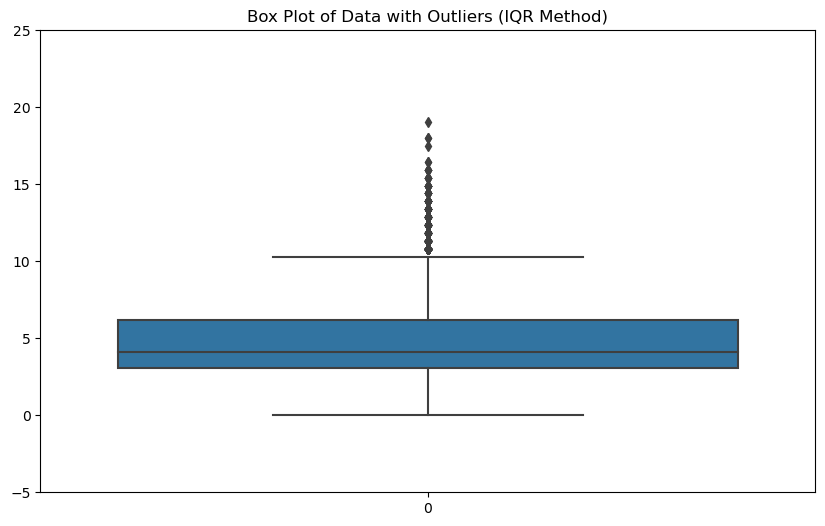

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(flight_df.wind_speed)
plt.title("Box Plot of Data with Outliers (IQR Method)")
plt.ylim(-5,25)
plt.show()

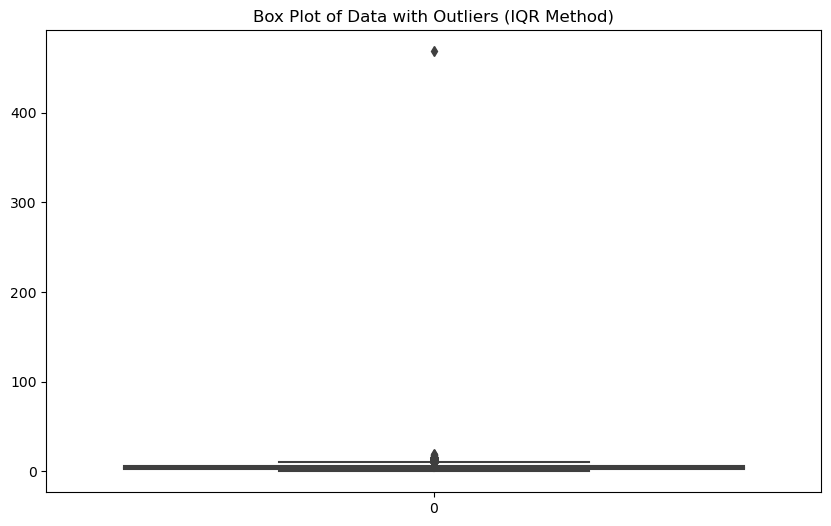

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(flight_df.wind_speed)
plt.title("Box Plot of Data with Outliers (IQR Method)")
#plt.ylim(-5,25)
plt.show()

In [66]:
# Removing that one extreme outlier
flight_df['wind_speed'].max()

468.61717926

In [67]:
# Filtering out the extreme outlier and dropping the anomoly before proceeding with further analysis
filtered = flight_df[flight_df['wind_speed'] == 468.61717926].index
flight_df.drop(filtered , inplace=True)

In [68]:
flight_df.shape #shape of the dataset after dropping the extreme outlier

(26129, 15)

In [69]:
flight_df['origin'].unique()

array(['EWR', 'JFK', 'LGA'], dtype=object)

In [70]:
# Filtering data by airport. Extracting the 3 subsets
jfk_monthly_df = flight_df[flight_df['origin'] == 'JFK']
ewr_monthly_df = flight_df[flight_df['origin'] == 'EWR']
lga_monthly_df = flight_df[flight_df['origin'] == 'LGA']

In [71]:
jfk_monthly_df.shape

(8711, 15)

In [72]:
ewr_monthly_df.shape #The exterme outlier was here in this subset

(8707, 15)

In [73]:
lga_monthly_df.shape

(8711, 15)

In [74]:
# Group by month, and compute mean wind speed
jfk_monthly_wind_speed_mean = jfk_monthly_df.groupby(['month'])['wind_speed'].mean()
ewr_monthly_wind_speed_mean = ewr_monthly_df.groupby(['month'])['wind_speed'].mean()
lga_monthly_wind_speed_mean = lga_monthly_df.groupby(['month'])['wind_speed'].mean()

In [75]:
jfk_monthly_wind_speed_mean

month
1     5.377993
2     5.954299
3     6.208833
4     5.583980
5     4.599858
6     4.883929
7     4.497869
8     4.304778
9     4.359529
10    4.614951
11    5.752306
12    4.861067
Name: wind_speed, dtype: float64

In [76]:
ewr_monthly_wind_speed_mean

month
1     4.327734
2     4.731236
3     5.143987
4     4.265222
5     3.709340
6     4.202351
7     4.022167
8     3.349152
9     3.574319
10    3.650413
11    4.598609
12    3.911290
Name: wind_speed, dtype: float64

In [77]:
lga_monthly_wind_speed_mean

month
1     5.068523
2     5.521724
3     5.848338
4     4.931083
5     4.197465
6     4.462408
7     4.180960
8     3.733741
9     3.933721
10    4.568250
11    5.416358
12    4.525994
Name: wind_speed, dtype: float64

In [78]:
#Transforming the Series into a Data Frame
jfk = jfk_monthly_wind_speed_mean.to_frame().reset_index()
ewr = ewr_monthly_wind_speed_mean.to_frame().reset_index()
lga = lga_monthly_wind_speed_mean.to_frame().reset_index()

In [79]:
jfk

,month,wind_speed
0,1,5.377993
1,2,5.954299
2,3,6.208833
3,4,5.583980
4,5,4.599858
5,6,4.883929
6,7,4.497869
7,8,4.304778
8,9,4.359529
9,10,4.614951


In [80]:
ewr

,month,wind_speed
0,1,4.327734
1,2,4.731236
2,3,5.143987
3,4,4.265222
4,5,3.709340
5,6,4.202351
6,7,4.022167
7,8,3.349152
8,9,3.574319
9,10,3.650413


In [81]:
lga

,month,wind_speed
0,1,5.068523
1,2,5.521724
2,3,5.848338
3,4,4.931083
4,5,4.197465
5,6,4.462408
6,7,4.180960
7,8,3.733741
8,9,3.933721
9,10,4.568250


In [82]:
#Merging the 3 resultant monthly means into one dataframe so we can compare the average means in each of the airport by months
three_airports_monthly_means = pd.merge(pd.merge(jfk,ewr,on='month'),lga,on='month')

In [83]:
three_airports_monthly_means

,month,wind_speed_x,wind_speed_y,wind_speed
0,1,5.377993,4.327734,5.068523
1,2,5.954299,4.731236,5.521724
2,3,6.208833,5.143987,5.848338
3,4,5.583980,4.265222,4.931083
4,5,4.599858,3.709340,4.197465
5,6,4.883929,4.202351,4.462408
6,7,4.497869,4.022167,4.180960
7,8,4.304778,3.349152,3.733741
8,9,4.359529,3.574319,3.933721
9,10,4.614951,3.650413,4.568250


In [84]:
three_airports_monthly_means.rename(columns = {'wind_speed_x':'wind_speed_jfk','wind_speed_y':'wind_speed_ewr','wind_speed':'wind_speed_lga'}, inplace = True) 

In [85]:
#Resultant average wind speed means by airport by month
three_airports_monthly_means

,month,wind_speed_jfk,wind_speed_ewr,wind_speed_lga
0,1,5.377993,4.327734,5.068523
1,2,5.954299,4.731236,5.521724
2,3,6.208833,5.143987,5.848338
3,4,5.583980,4.265222,4.931083
4,5,4.599858,3.709340,4.197465
5,6,4.883929,4.202351,4.462408
6,7,4.497869,4.022167,4.180960
7,8,4.304778,3.349152,3.733741
8,9,4.359529,3.574319,3.933721
9,10,4.614951,3.650413,4.568250


<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 9: Plot Monthly Mean Wind Speeds for all the 3 Airports. </h2>


<p style="color:#20568B; font-size:15px";>
This above merged dataframe is now visualized using a plot to compare the monhtly mean wind speeds of LGA, EWR and JFA airports in New York City.
</p>

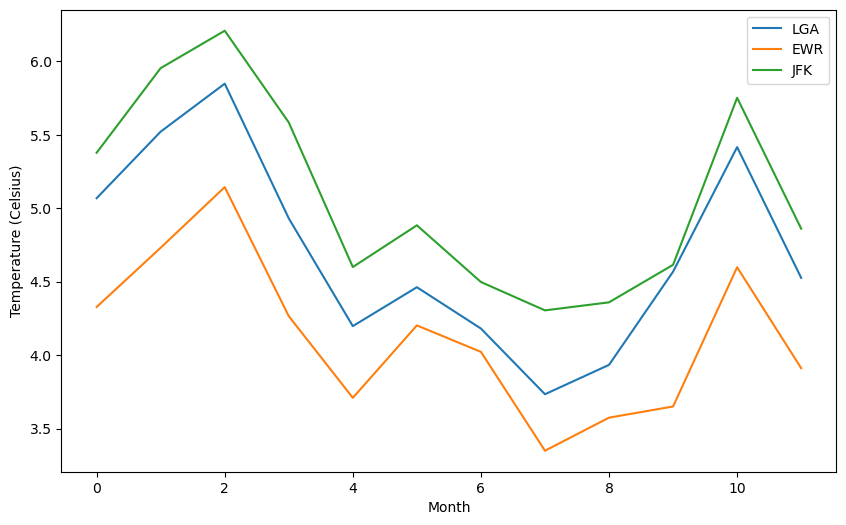

In [86]:
plt.figure(figsize=(10, 6)) # Setting the size of the plot
#Labelling the plot
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
#Plotting the graph
plt.plot(three_airports_monthly_means['wind_speed_lga'], label= "LGA")
plt.plot(three_airports_monthly_means['wind_speed_ewr'], label= "EWR")
plt.plot(three_airports_monthly_means['wind_speed_jfk'], label= "JFK")
#Displaying the legend
plt.legend()

**Conclusion**

<p style="color:#20568B; font-size:15px";>
We have seen above how the pandas library can be used to read the csv file into a dataframe and then perform analysis on the NYC Flight dataset. In summary we have,
</p>

* Loaded the source data into a dataframe.

* Data manipulation was done to convert the units of measurement to the SI system.

* Grouped the data of LGA airport and calculated the daily mean.

* Visualized the calculated mean using a line plot.

* Calculated the monthly mean by airport and visualized the same.

* Further correlation analysis can also be done to see the correlation between the variables.

* If more data is available on conditions that would be favourable for take off and landing we can build a predictive model to predict if the conditions are optimal for take off and landing.

**References**

* Minimilast Data Wrangling with Python (v1.0.3.9011), Marek Gagolewski, Introducing data frames, https://datawranglingpy.gagolewski.com/chapter/410-data-frame.html, accessed 11th January 2024.
* Minimilast Data Wrangling with Python (v1.0.3.9011), Marek Gagolewski, Processing data in groups, https://datawranglingpy.gagolewski.com/chapter/430-group-by.html, accessed 11th January 2024.
